In [13]:
import pandas as pd

data = pd.read_csv("0_1_classification_data.csv")
data[0:1]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,t1,t2
0,1,1,1,1,0,1,1,0,1,1,1,1,1,0


In [14]:
import numpy as np

eta = 0.2

w2_1 = np.random.normal(size=12) # 1층에서 2층 1번으로의 가중치 12가지
w2_2 = np.random.normal(size=12) # 1층에서 2층 2번으로의 가중치 12가지
w2_3 = np.random.normal(size=12) # 1층에서 2층 3번으로의 가중치 12가지
w3_1 = np.random.normal(size=3) # 2층에서 3층 1번으로의 가중치 3가지
w3_2 = np.random.normal(size=3) # 2층에서 3층 2번으로의 가중치 3가지

b2 = np.random.normal(size=3) # 2층 3개 유닛의 편향 3가지
b3 = np.random.normal(size=2) # 3층 2개 유닛의 편향 2가지


In [15]:
def a(z):
    return 1 / (1 +np.exp(-z))
#시그모이드 함수를 활성화 함수로 사용
def ap(z):
    return a(z)*(1-a(z))
#시그모이드 함수의 미분성질을 이용해 a prime 값을 구한다.

In [16]:
CT_history = [0]*50



for N in range(50): # 경사하강을 50번에 걸쳐 반복한다.

    dw2_1 = [0]*12
    dw2_2 = [0]*12
    dw2_3 = [0]*12
    dw3_1 = [0]*3
    dw3_2 = [0]*3
    db2 = [0]*3
    db3 = [0]*3
    CT = 0
    for idx, items in data.iterrows():

        x = items[:12].to_numpy()
        t1 = items.t1
        t2 = items.t2
        # 입력 x와 실젯값 t1, t2

        z2_1 = np.dot(w2_1,x)+b2[0]
        z2_2 = np.dot(w2_2,x)+b2[1]
        z2_3 = np.dot(w2_3,x)+b2[2]
        # z 값 ( 2층으로의 입력될 값) 구하기

        a2_1 = a(z2_1) # a는 z에 활성화함수.
        a2_2 = a(z2_2)
        a2_3 = a(z2_3)

        a2 = [a2_1,a2_2,a2_3]
        # 2층의 a값 구하기
        z3_1 = np.dot(w3_1,a2)+b3[0]
        z3_2 = np.dot(w3_2,a2)+b3[1]
        a3_1 = a(z3_1)
        a3_2 = a(z3_2)

        a3 = [a3_1,a3_2]
        # 3층의 a값 구하기

        C = 0.5*( (t1 - a3[0])**2 + (t2 - a3[1])**2 )
        CT+= C
        # 비용 C 구하기

        delta3_1 = (a3[0]-t1) * ap(z3_1) # 시그모이드 함수의 미분 성질을 이용하여 식을 간단히 정리
        delta3_2 = (a3[1]-t2) * ap(z3_2)
        delta3 = [delta3_1, delta3_2]
        #delta 마지막 항 구하기

        delta2_1 = np.dot(delta3,[w3_1[0],w3_2[0]] ) * ap(z2_1)
        delta2_2 = np.dot(delta3,[w3_1[1],w3_2[1]] ) * ap(z2_2)
        delta2_3 = np.dot(delta3,[w3_1[2],w3_2[2]] ) * ap(z2_3)
        delta2 = [delta2_1, delta2_2, delta2_3]
        #3층의 delta 를 이용해 오차역전파법으로 2층의 delta 구하기

        for i in range(12):
            dw2_1[i] += delta2_1*x[i]
            dw2_2[i] += delta2_2*x[i]
            dw2_3[i] += delta2_3*x[i]
        #1층에서 2층으로의 36가지 가중치 편미분 값을 더해서 저장해둔다.

        for i in range(3):
            dw3_1[i] += delta3_1*a2[i]
            dw3_2[i] += delta3_2*a2[i]
        #3층에서 2층으로의 6가지 가중치 편미분 값을 더해서 저장해둔다.

        db2[0] += delta2_1
        db2[1] += delta2_2
        db2[2] += delta2_3
        db3[0] += delta3_1
        db3[1] += delta3_2
        #2층, 3층 5개 유닛의 편향 편미분 값을 더해서 저장해둔다.
    CT_history[N]= CT # 비용의 합을 저장해둔다.

#64개 데이터에 대해 모든 편미분값들의 합을 구한 후, 이에 학습률을 곱하여 가중치와 편향들을 변화시킨다.
    for i in range(12):
        w2_1[i] += -eta*dw2_1[i]
        w2_2[i] += -eta*dw2_2[i]
        w2_3[i] += -eta*dw2_3[i]
        #1층에서 2층으로의 36가지 가중치를 정답에 가까운 곳으로 변화시킨다.

    for i in range(3):
        w3_1[i] += -eta*dw3_1[i]
        w3_2[i] += -eta*dw3_2[i]
        #3층에서 2층으로의 6가지 가중치를 정답에 가까운 곳으로 변화시킨다.

    b2[0] += -eta*b2[0]
    b2[1] += -eta*b2[1]
    b2[2] += -eta*b2[2]
    b3[0] += -eta*b3[0]
    b3[1] += -eta*b3[1]
    #2층, 3층 5개 유닛의 편향을 정답에 가까운 곳으로 변화시킨다.


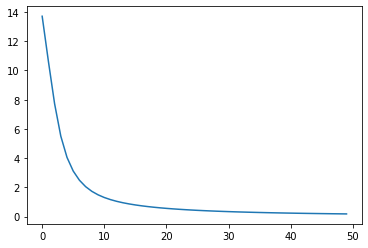

In [17]:
import matplotlib.pyplot as plt

plt.plot(CT_history)
plt.show()

In [18]:
test = [
        0,1,0,
        1,0,1,
        1,0,1,
        1,0,1
       ]
x = test
# 입력 x와 실젯값 t1, t2
z2_1 = np.dot(w2_1,x)+b2[0]
z2_2 = np.dot(w2_2,x)+b2[1]
z2_3 = np.dot(w2_3,x)+b2[2]
# z 값 ( 2층으로의 입력될 값) 구하기

a2_1 = a(z2_1) # a는 z에 활성화함수.
a2_2 = a(z2_2)
a2_3 = a(z2_3)

a2 = [a2_1,a2_2,a2_3]
# 2층의 a값 구하기
z3_1 = np.dot(w3_1,a2)+b3[0]
z3_2 = np.dot(w3_2,a2)+b3[1]
a3_1 = a(z3_1)
a3_2 = a(z3_2)

print(a3_1)
print(a3_2)

0.9739163763583227
0.02718914252012758
